In [143]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


In [145]:
train= pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
y_train = train['Survived']
train.columns



train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

In [147]:
# Save the 'Id' column
train1= pd.read_csv('train.csv')
test1 =  pd.read_csv('test.csv')
train_ID = train1['PassengerId']
test_ID = test1['PassengerId']

In [98]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
#train= train.drop('Survived', axis=1)
all_data = pd.concat([train,test]).reset_index(drop=True)
all_data = all_data.drop('Survived', axis=1)

In [101]:
all_data.shape

(1309, 10)

In [102]:
ntrain = train.shape[0]
ntest = test.shape[0]

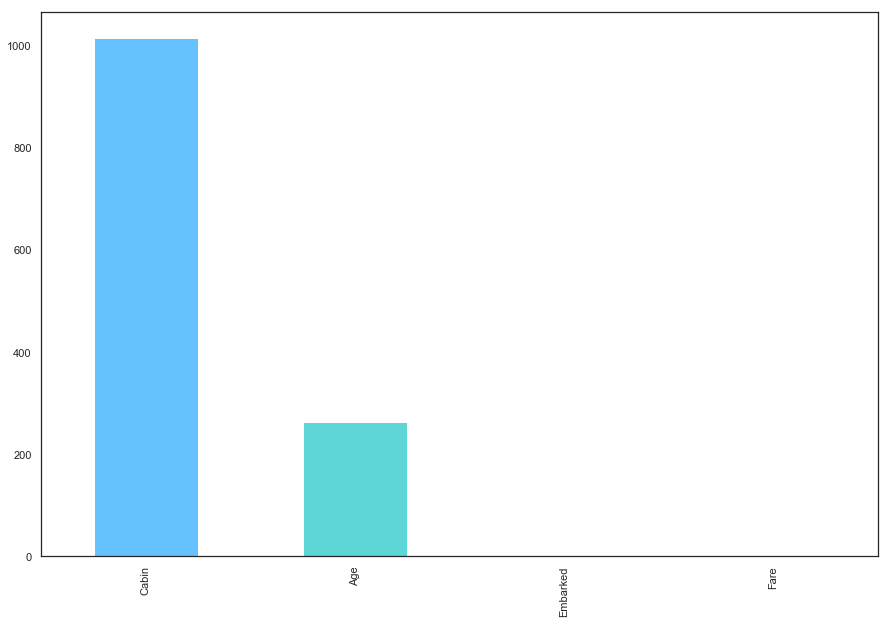

In [103]:
all_data_na = all_data.isnull().sum()

# get rid of all the values with 0 missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.subplots(figsize =(15, 10))
all_data_na.plot(kind='bar');

In [104]:
#Fill missing data in Cabin by Pclass 
#aggregate 'Cabin' by floor size 
#


In [105]:
all_data.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

/Users/noraamri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


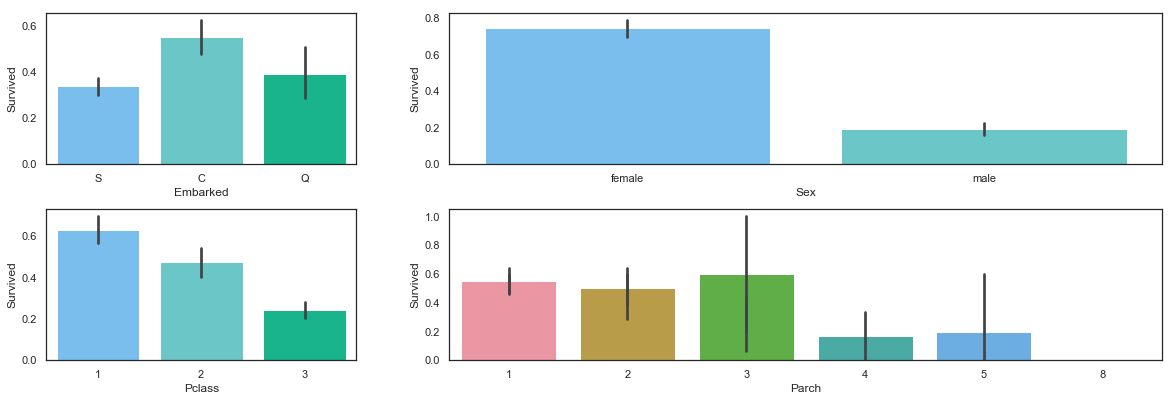

In [106]:

grid = plt.GridSpec(3, 3, wspace=0.30, hspace=0.30)
plt.subplots(figsize =(20, 10))
plt.subplot(grid[0,0])
sns.barplot(x="Embarked", y="Survived", data=train, order=['S', 'C', 'Q']);
plt.subplot(grid[0,1:])
sns.barplot(x="Sex", y="Survived", data=train, order=['female', 'male']);
plt.subplot(grid[1, 0])
sns.barplot(x="Pclass", y="Survived", data=train, order=[1, 2, 3]);
plt.subplot(grid[1, 1:])
sns.barplot(x="SibSp", y="Survived", data=train, order=[1, 2, 3, 4, 5, 8]);
plt.subplot(grid[1, 1:])
sns.barplot(x="Parch", y="Survived", data=train, order=[1, 2, 3, 4, 5, 8]);


In [107]:
#convert age into categorical variable 


In [108]:
all_data = pd.get_dummies(all_data, columns = ["Sex"], prefix="Sex")
all_data = pd.get_dummies(all_data, columns = ["Embarked"], prefix="Embarked")
all_data = pd.get_dummies(all_data, columns = ["Pclass"], prefix="Pclass")

all_data['SibSp'] = all_data['SibSp'].map({0:'zero', 1:'one', 2:'two', 3:'three', 4:'more than 3', 5:'more than 3',  8:'more than 3'})
all_data['Parch'] = all_data['Parch'].map({0:'zero', 1:'one', 2:'2 or more', 3:'2 or more', 4:'2 or more', 5:'2 or more',5:'2 or more',  9:'2 or more'})
all_data = pd.get_dummies(all_data, columns = ["Parch"], prefix="Parch")
all_data = pd.get_dummies(all_data, columns = ["SibSp"], prefix="SibSp")

all_data = all_data.drop('Ticket', axis=1)

In [109]:
all_data.head(3)

,Age,Cabin,Fare,Name,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Parch_2 or more,Parch_one,Parch_zero,SibSp_more than 3,SibSp_one,SibSp_three,SibSp_two,SibSp_zero
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1


In [110]:
all_data['Title'] = all_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
all_data['Title'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title, dtype: object

In [111]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

all_data.Title = all_data.Title.map(normalized_titles)


In [112]:
all_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [113]:
list(all_data[all_data.Age.isnull()].Title.unique())

['Mr', 'Mrs', 'Miss', 'Master', 'Officer']

In [114]:
all_data[all_data.Title == 'Miss' ].Age.mean()

21.795235849056603

In [115]:
titles = list(all_data[all_data.Age.isnull()].Title.unique())
titles_age_mean = {}
for i in titles:
    mean = all_data[all_data.Title == i ].Age.mean()
    titles_age_mean[i] = mean
    

In [116]:
titles_age_mean

{'Mr': 32.25215146299484,
 'Mrs': 36.866279069767444,
 'Miss': 21.795235849056603,
 'Master': 5.482641509433963,
 'Officer': 46.27272727272727}

In [117]:
np.isnan(all_data[all_data.Age.isnull()].Age.iloc[0])

True

In [118]:
# all_data[(all_data.Title== 'Mr')&(all_data.Age.isnull())] = titles_age_mean['Mr']

In [119]:
type(all_data[all_data.Age.isnull()].Age.iloc[0])

numpy.float64

In [120]:
def fill_age(row):
    if np.isnan(row.Age): 
        row.Age = titles_age_mean[row.Title] 
    return row 
all_data = all_data.apply(fill_age, axis=1)

In [121]:
all_data.Age.isnull().sum()

0

In [122]:
def set_age_group(row):
    age = row["Age"]
    if age < 12:
        return "Child"
    elif age >= 12 and age < 25:
        return "Teenager"
    elif age >= 25 and age < 60:
        return "Adult"
    else:
        return "Elderly"

In [123]:
all_data["Age_group"] = all_data.apply(set_age_group, axis=1)

In [124]:
all_data["Age_group"]

0       Teenager
1          Adult
2          Adult
3          Adult
4          Adult
5          Adult
6          Adult
7          Child
8          Adult
9       Teenager
10         Child
11         Adult
12      Teenager
13         Adult
14      Teenager
15         Adult
16         Child
17         Adult
18         Adult
19         Adult
20         Adult
21         Adult
22      Teenager
23         Adult
24         Child
25         Adult
26         Adult
27      Teenager
28      Teenager
29         Adult
          ...   
1279    Teenager
1280       Child
1281    Teenager
1282       Adult
1283    Teenager
1284       Adult
1285       Adult
1286    Teenager
1287    Teenager
1288       Adult
1289    Teenager
1290       Adult
1291       Adult
1292       Adult
1293    Teenager
1294    Teenager
1295       Adult
1296    Teenager
1297    Teenager
1298       Adult
1299    Teenager
1300       Child
1301    Teenager
1302       Adult
1303       Adult
1304       Adult
1305       Adult
1306       Adu

In [125]:
all_data = pd.get_dummies(all_data, columns = ["Age_group"], prefix="Age_group")
all_data = pd.get_dummies(all_data, columns = ["Title"], prefix="Title")


In [126]:
all_data.Age = all_data.Age.map(lambda x: int(round(x)))


In [127]:
all_data = all_data.drop('Cabin', axis=1)
all_data = all_data.drop('Fare', axis=1)
all_data = all_data.drop('Name', axis=1)

In [128]:
all_data.head(3)

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Parch_2 or more,...,Age_group_Adult,Age_group_Child,Age_group_Elderly,Age_group_Teenager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,38,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,26,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [129]:
all_data.to_csv('all_data2.csv')

In [130]:
#Splitting 
x_train = all_data[:ntrain]
x_test = all_data[ntrain:]



In [136]:
x_test.shape

(418, 27)

In [137]:
#Modelling 
#Adaboost Gridsearch 



dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(DecisionTreeClassifier(),)
params = {"n_estimators":[180, 250, 300],
          "learning_rate": [0.1,1],
          "base_estimator__max_depth":[60, 75],
         "base_estimator__max_features":[15,20,27]
         }
gs =GridSearchCV(estimator = ada,
    param_grid=params)
gs.fit(x_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [180, 250, 300], 'learning_rate': [0.1, 1], 'base_estimator__max_depth': [60, 75], 'base_estimator__max_features': [15, 20, 27]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=75,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=300, random_state=None)

In [139]:
gs.best_score_

0.7912457912457912

In [141]:
#Adaboost best estimator 
dt = DecisionTreeClassifier(max_depth=75, max_features=20)
ada = AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1, n_estimators=300)
ada.fit(x_train, y_train)
np.mean(cross_val_score(ada, x_train, y_train, cv=7)), ada.score(x_train, y_train)


(0.8125757438802291, 0.9382716049382716)

In [142]:
#predictions 

y_prds = ada.predict(x_test)

In [148]:
adaboost1_preds = pd.DataFrame()
adaboost1_preds['PassengerId'] = test_ID
adaboost1_preds['Survived'] = y_prds

In [149]:
adaboost1_preds.to_csv('adaboost1_preds.csv',index=False)
